In [18]:
import joblib

In [19]:
import pandas as pd
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [20]:
df=pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [21]:
Reviews=df['Text']
Reviews

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [22]:
stop_words=stopwords.words('english')
Lemmatizer=WordNetLemmatizer()

In [23]:
def preprocess_text(text, return_lst=True):
    text=re.sub(r'<.*?>','',text)
    text = re.sub(r'http[s]?://\S+|http\s?:\S+', '', text)
    text=text.lower()
    text=text.translate(str.maketrans('','',string.punctuation)) 
    words=text.split(' ')
    lst=[]
    for word in words:
        if word and word not in stop_words:
            word=Lemmatizer.lemmatize(word)
            lst.append(word)
    if return_lst==True:
        return lst
    else:
        return ' '.join(lst)

In [24]:
joblib.dump(preprocess_text,"preprocess_text.joblib")

['preprocess_text.joblib']

In [25]:
processed_review=Reviews.apply(preprocess_text)

In [26]:
joblib.dump(processed_review,"processed_review.joblib")

['processed_review.joblib']

In [27]:
joblib.dump(Reviews,"Reviews.joblib")

['Reviews.joblib']

In [28]:
all_words=[word for text in processed_review for word in text]
all_words

['bought',
 'several',
 'vitality',
 'canned',
 'dog',
 'food',
 'product',
 'found',
 'good',
 'quality',
 'product',
 'look',
 'like',
 'stew',
 'processed',
 'meat',
 'smell',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better',
 'product',
 'arrived',
 'labeled',
 'jumbo',
 'salted',
 'peanutsthe',
 'peanut',
 'actually',
 'small',
 'sized',
 'unsalted',
 'sure',
 'error',
 'vendor',
 'intended',
 'represent',
 'product',
 'jumbo',
 'confection',
 'around',
 'century',
 'light',
 'pillowy',
 'citrus',
 'gelatin',
 'nut',
 'case',
 'filbert',
 'cut',
 'tiny',
 'square',
 'liberally',
 'coated',
 'powdered',
 'sugar',
 'tiny',
 'mouthful',
 'heaven',
 'chewy',
 'flavorful',
 'highly',
 'recommend',
 'yummy',
 'treat',
 'familiar',
 'story',
 'c',
 'lewis',
 'lion',
 'witch',
 'wardrobe',
 'treat',
 'seduces',
 'edmund',
 'selling',
 'brother',
 'sister',
 'witch',
 'looking',
 'secret',
 'ingredient',
 'robitussin',
 'believe',
 'found',
 'got',
 'addition',
 'r

In [29]:
unigrams = list(ngrams(all_words, 1))
bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

In [30]:
unigram_freq = FreqDist(unigrams)
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)

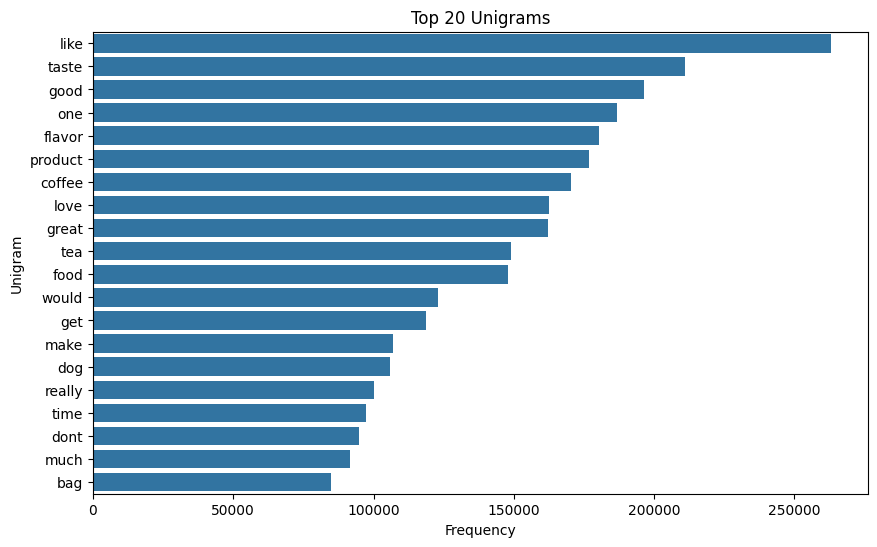

In [31]:
top_unigrams = unigram_freq.most_common(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[count for unigram, count in top_unigrams], y=[unigram[0] for unigram, count in top_unigrams])
plt.title('Top 20 Unigrams')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

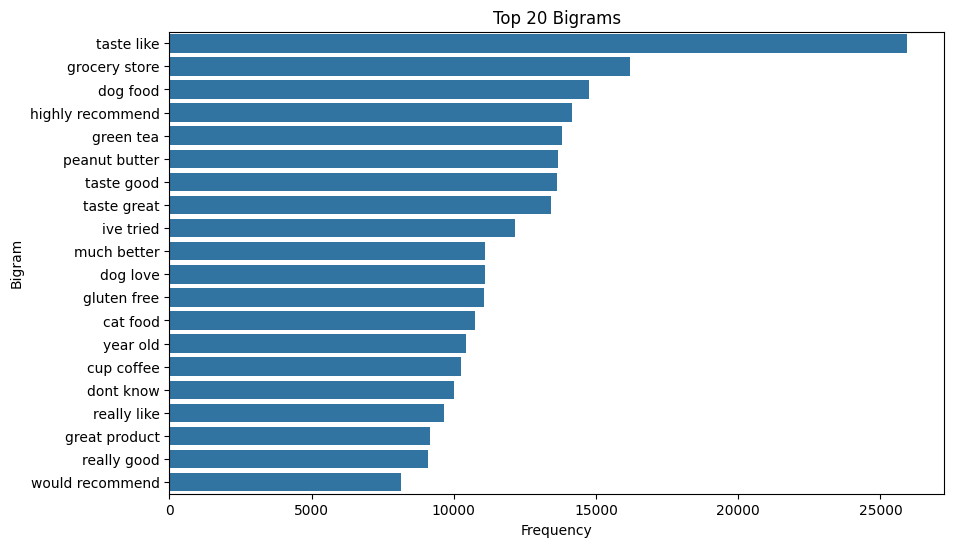

In [32]:
top_bigrams = bigram_freq.most_common(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[count for bigram, count in top_bigrams], y=[f"{bigram[0]} {bigram[1]}" for bigram, count in top_bigrams])
plt.title('Top 20 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

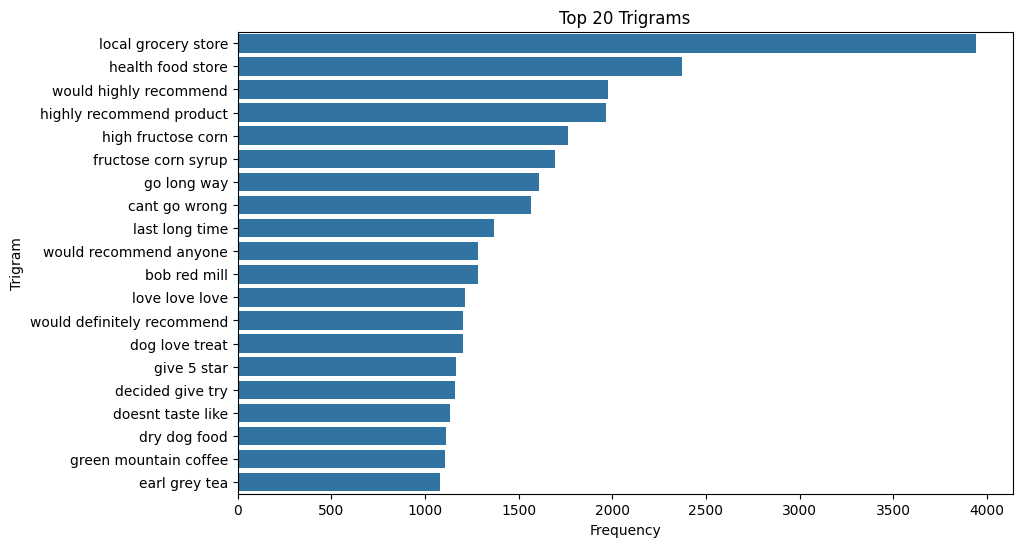

In [33]:
top_trigrams = trigram_freq.most_common(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[count for trigram, count in top_trigrams], y=[f"{trigram[0]} {trigram[1]} {trigram[2]}" for trigram, count in top_trigrams])
plt.title('Top 20 Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

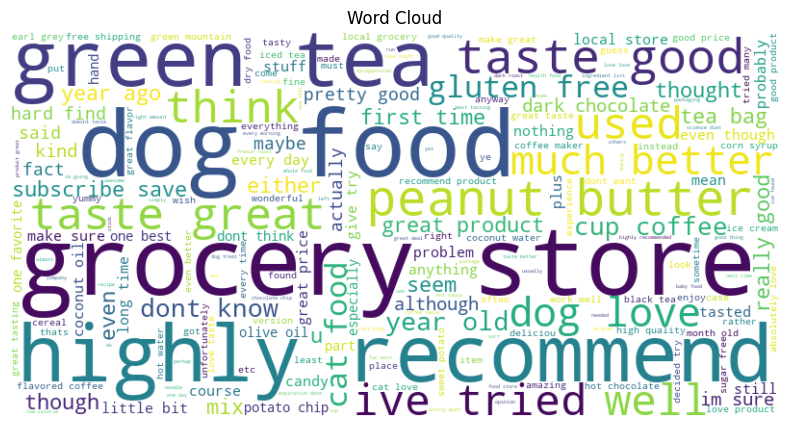

In [ ]:
all_words_str = ' '.join(all_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words_str)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

## Task 2

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [36]:
corpus=processed_review.apply(lambda x: ' '.join(x))

In [37]:
tfidf=TfidfVectorizer()
tfidf.fit(corpus)
matrix=tfidf.transform(corpus)

In [38]:
joblib.dump(matrix,"matrix.joblib")

['matrix.joblib']

In [39]:
joblib.dump(tfidf,"tfidf.joblib")

['tfidf.joblib']

In [40]:
subset_matrix = matrix[:100, :100]
dense_subset_matrix = subset_matrix.toarray()
print(dense_subset_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
def compute_cosine_sim(query,matrix):
    query_processed=preprocess_text(query,False)
    query_mat=tfidf.transform([query_processed])
    similarity=cosine_similarity(query_mat,matrix)
    print(f"Maximum Similarity Score= {similarity.max()}")
    print(f"Average Similarity Score Across all Documents= {similarity.mean()}")
    return similarity.flatten()

def recommend_top_five(reviews, similarity):
    sorted_sim = np.argsort(similarity)[-5:][::-1]
    unique_docs = {}
    for i in sorted_sim:
        doc = reviews[i]
        score = similarity[i]
        if doc not in unique_docs:
            unique_docs[doc] = score
        if len(unique_docs) == 5:
            break

    return list(unique_docs.keys()), list(unique_docs.values())


In [42]:
joblib.dump(compute_cosine_sim,"compute_cosine_sim.joblib")
joblib.dump(recommend_top_five,"recommend_top_five.joblib")

['recommend_top_five.joblib']

In [43]:
similarity=compute_cosine_sim("This is great",matrix)
#query=input("Please Enter String")
#compute_cosine_sim(query,matrix)    
top_documents, top_scores =recommend_top_five(Reviews,similarity)
for i, (doc, score) in enumerate(zip(top_documents, top_scores)):
    print(f"Rank {i+1}:")
    print(f"Document: {doc}")
    print(f"Score: {score}\n")

Maximum Similarity Score= 0.9001708684877006
Average Similarity Score Across all Documents= 0.023087637355223515
Rank 1:
Document: GREAT GREAT GREAT GREAT GREAT GREAT GREAT GREAT GREAT GREAT  MASHED POTATOES -- KEPT SELLING HONEST EARTH POTATOES  THEY ARE GREAT GREAT GREAT GREAT GREAT ...........
Score: 0.9001708684877006

Rank 2:
Document: Great item at a great price.  Less blueberry would have been great.  All the other flavors were great.  Thanks for a great time with COFFEE !!!
Score: 0.7206406792526001

Rank 3:
Document: This is a great deal, and a great coffee. I drink it every morning, great flavor and a great price.
Score: 0.7099174816435485

Rank 4:
Document: Great coffee.  Great taste.  Great price on amazon.  This blend smells great when it's being made and is one of my favorites.
Score: 0.6911869383625368



## Task 3

In [44]:
from gensim.models import Word2Vec


In [ ]:
cbow=Word2Vec(processed_review,sg=0,vector_size=100,window=5)
skip_gram=Word2Vec(processed_review,sg=1,vector_size=100,window=5)


In [46]:
joblib.dump(cbow,"cbow.joblib")
joblib.dump(skip_gram,"skip_gram.joblib")

['skip_gram.joblib']

In [47]:
cbow.wv["sample"]

array([-1.2348247 ,  0.19783652, -0.43407017, -0.6707898 , -1.6355749 ,
        1.3935317 , -0.19951037, -0.40450412,  3.978919  , -1.889968  ,
        1.5049897 ,  2.8949945 ,  1.8739457 ,  2.8766391 ,  0.03942397,
        2.3607128 ,  2.3596697 , -3.02892   ,  1.7593324 , -0.18888552,
        1.3291433 , -0.57988346,  4.6664386 , -2.2416427 ,  0.2636873 ,
       -0.20269229,  1.5745488 ,  0.02684512, -0.5102298 , -2.142367  ,
       -3.824955  , -0.40936324,  0.10519607,  0.8311183 , -0.00600451,
        1.5337832 , -1.2988592 , -1.6559863 , -0.233376  ,  1.0479747 ,
        2.3803673 , -0.6713083 ,  2.5848765 ,  0.8206241 , -1.5231942 ,
       -2.5519664 ,  0.6953353 ,  1.7175432 ,  0.20941971,  1.9794456 ,
        2.120371  , -0.6463831 ,  4.045323  ,  0.46523812,  1.7550023 ,
       -1.0735626 ,  0.9911284 ,  0.4613019 ,  2.3531816 , -0.4205584 ,
        2.7236664 ,  0.54654026,  1.8446424 , -3.966796  , -1.4509083 ,
        0.61992943,  2.6262434 , -0.27197388, -2.970215  , -1.32

In [48]:
similar_words = cbow.wv.most_similar("horrible")
print(similar_words)

[('terrible', 0.9023890495300293), ('awful', 0.8911415934562683), ('disgusting', 0.7938287854194641), ('nasty', 0.7937064170837402), ('horrid', 0.7906178832054138), ('gross', 0.7598369121551514), ('aweful', 0.7166417837142944), ('bad', 0.7160045504570007), ('foul', 0.7146310806274414), ('horrendous', 0.6975915431976318)]


In [49]:
def get_sentence_embedding(model, sentence):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)
get_sentence_embedding(cbow,"this has been horrible experience")

array([-4.0967768e-01, -5.2225989e-01,  1.2469207e+00,  3.9533982e-01,
       -6.4405060e-01,  1.2821885e+00,  1.1295017e+00,  7.5410110e-01,
        1.3688287e-01, -4.7019169e-01, -5.5491132e-01,  6.1962557e-01,
        1.6625254e-01,  8.1690240e-01,  7.8547281e-01, -1.7165142e-01,
        1.3723958e+00,  9.9199414e-01, -6.7466873e-01,  5.6695366e-01,
        1.9784272e-03, -1.0394760e+00,  5.4334927e-01, -1.0272974e+00,
        2.1485505e+00, -1.3247213e+00,  5.3207469e-01, -7.2355419e-01,
       -3.0344886e-01,  4.3785238e-01,  1.3897610e+00, -2.0276064e-02,
       -9.4440281e-01, -6.8266445e-01,  7.8524882e-01, -3.5487020e-01,
       -3.3255103e-01,  1.0253534e+00,  1.0350378e+00,  5.8467740e-01,
        3.6056775e-01, -1.8660213e+00, -2.9072189e-01, -4.4387639e-02,
       -4.7006619e-01,  1.3522335e+00,  1.6555048e+00, -5.8052242e-01,
       -1.4377804e+00, -1.5028405e-01,  9.4155550e-01, -2.2313714e-02,
       -1.0962034e+00,  1.7038056e+00,  1.1687584e+00,  8.5573804e-01,
      

In [50]:
joblib.dump(get_sentence_embedding,"get_sentence_embedding.joblib")

['get_sentence_embedding.joblib']

In [51]:
corpus_embedding_cbow=np.array([get_sentence_embedding(cbow,doc) for doc in corpus])
corpus_embedding_skip_gram=np.array([get_sentence_embedding(skip_gram,doc) for doc in corpus])

In [52]:
joblib.dump(corpus_embedding_cbow,"corpus_embedding_cbow.joblib")
joblib.dump(corpus_embedding_skip_gram,"corpus_embedding_skip_gram.joblib")

['corpus_embedding_skip_gram.joblib']

In [53]:
def compute_cosine_sim_w2v(model,query,cbow=True):
    query_processed=preprocess_text(query,False)
    query_embedding=get_sentence_embedding(model,query_processed)
    if cbow:
        similarity=cosine_similarity([query_embedding],corpus_embedding_cbow)
    else:
        similarity=cosine_similarity([query_embedding],corpus_embedding_skip_gram)
    print(f"Maximum Similarity Score= {similarity.max()}")
    print(f"Average Similarity Score Across all Documents= {similarity.mean()}")
    return similarity.flatten()
def recommend_top_five_w2v(corpus,similarity):
    sorted_sim=np.argsort(similarity)[-5:][::-1]
    unique_docs={}
    for i in sorted_sim:
        doc=corpus[i]
        sim=similarity[i]
        if doc not in unique_docs:
            unique_docs[doc] = score
        if len(unique_docs) == 5:
            break
    return list(unique_docs.keys()), list(unique_docs.values())

In [54]:
joblib.dump(compute_cosine_sim_w2v,"compute_cosine_sim_w2v.joblib")
joblib.dump(recommend_top_five_w2v,"recommend_top_five_w2v.joblib")

['recommend_top_five_w2v.joblib']

### Cbow

In [55]:
similarity=compute_cosine_sim_w2v(cbow,"This is great")
#query=input("Enter query")
#similarity=compute_cosine_sim_w2v(cbow,query)
top_documents,top_scores=recommend_top_five(Reviews,similarity)
for idx, (doc,score) in enumerate(zip(top_documents,top_scores)):
    print(f"Rank {i+1}:")
    print(f"Document: {doc}")
    print(f"Score: {score}\n")

Maximum Similarity Score= 0.9679334759712219
Average Similarity Score Across all Documents= 0.25177958607673645
Rank 4:
Document: GREAT GREAT GREAT GREAT GREAT GREAT GREAT GREAT GREAT GREAT  MASHED POTATOES -- KEPT SELLING HONEST EARTH POTATOES  THEY ARE GREAT GREAT GREAT GREAT GREAT ...........
Score: 0.9679334759712219

Rank 4:
Document: excellent product, easy to make, tastes great, very low carb. awesome awesome awesome awesome awesome awesome awesome awesome awesome awesome
Score: 0.8620526790618896

Rank 4:
Document: TRY IT YOU WILL LIKE IT THE BEST AS YET I I I I LIKE IT ITS GREAT GREAT GREAT
Score: 0.8413074016571045

Rank 4:
Document: they are excellent
Score: 0.8271477222442627

Rank 4:
Document: Great Great Great! I love this oatmeal. It has big flakes, it is organic, what not to like? It is very yami and high in fiber. Great!
Score: 0.8267452716827393



### Skip-Gram

In [56]:
similarity=compute_cosine_sim_w2v(skip_gram,"This is great",False)
#query=input("Enter query")
#similarity=compute_cosine_sim_w2v(skip_gram,query,False)
top_documents,top_scores=recommend_top_five(Reviews,similarity)
for i, (doc,score) in enumerate(zip(top_documents,top_scores)):
    print(f"Rank {i+1}:")
    print(f"Document: {doc}")
    print(f"Score: {score}\n")

Maximum Similarity Score= 0.9497258067131042
Average Similarity Score Across all Documents= 0.5792601704597473
Rank 1:
Document: GREAT GREAT GREAT GREAT GREAT GREAT GREAT GREAT GREAT GREAT  MASHED POTATOES -- KEPT SELLING HONEST EARTH POTATOES  THEY ARE GREAT GREAT GREAT GREAT GREAT ...........
Score: 0.9497258067131042

Rank 2:
Document: TRY IT YOU WILL LIKE IT THE BEST AS YET I I I I LIKE IT ITS GREAT GREAT GREAT
Score: 0.8855460286140442

Rank 3:
Document: excellent product, easy to make, tastes great, very low carb. awesome awesome awesome awesome awesome awesome awesome awesome awesome awesome
Score: 0.8808495998382568

Rank 4:
Document: Great size for a quick snack and not only do they taste great but are good for you. I think they are also great for kids.
Score: 0.872409462928772

Rank 5:
Document: great product.one of the best coffees I have had .fast delivery.amazon is great .thank you
Score: 0.8534122705459595

